# SIR Agent Based Model

## Introduction
This is some introduction text.

## Differential Equation Background
This is also some text. This is a [reference](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_2) for the equations.

$$\dot S(t) = - \beta S(t)I(t)$$
$$\dot I(t) = \beta S(t)I(t) - \gamma I(t)$$
$$\dot R(t) = \gamma I(t)$$



## code setup

* here we will start by ....

In [8]:
cd(@__DIR__)
import Pkg
Pkg.activate(".")
 
using DifferentialEquations, ParameterizedFunctions, StatsPlots

  Activating project at `~/Documents/Documents - spectra/Dev/Julia/abm-dsap/code/01-basic-SIR`


* and then doing ...

In [18]:
SIR_diffeq = @ode_def begin
    dS = -β*S*I
    dI = (β*S*I) - (γ*I)
    dR = γ*I
end β γ

parameters = [0.4, 0.025] # β and γ parameters
init_I = 0.01 # 1% of population initially infected
init_SIR = [1 - init_I, init_I, 0.0] # initial values for S, I, R (must sum to 1)
tspan = (0.0, 200.0) # start and stop time points

SIR_diff_problem = ODEProblem(SIR_diffeq, init_SIR, tspan, parameters) # define the problem
SIR_diff_output = solve(SIR_diff_problem) # solve!

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 31-element Vector{Float64}:
   0.0
   0.13276835238446313
   0.7027816317038449
   1.6101433779685315
   2.676298451870517
   4.011622962775114
   5.566210722666843
   7.385120228422693
   9.492440778234092
  11.938188768328123
   ⋮
  62.06289504756632
  71.48257772197385
  84.63083401491835
 103.33655263819979
 123.06128698687267
 146.21275477005923
 170.9336848220296
 197.85670533903567
 200.0
u: 31-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9894612225430497, 0.010504754469778353, 3.402298717191829e-5]
 [0.9868260456037291, 0.01297325659556274, 0.0002006978007081579]
 [0.981322342944146, 0.01812741010452095, 0.0005502469513330387]
 [0.972084860392494, 0.026773774856155667, 0.0011413647513503046]
 [0.9543775516931956, 0.043332099560064945, 0.0022903487467394222]
 [0.9207339738473457, 0.07473266941857262, 0.004533356734081717]
 [0.854291

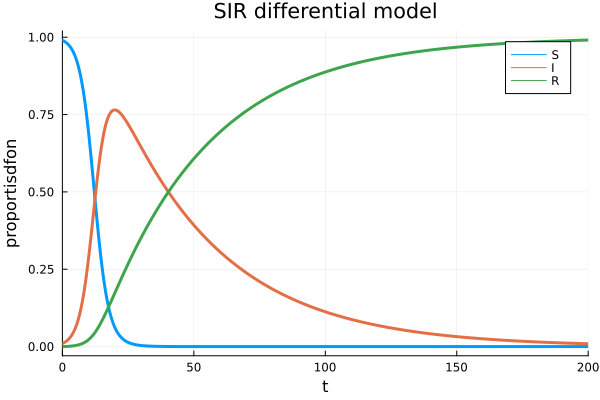

In [10]:
plot(SIR_diff_output, xlabel="t", ylabel="proportion", title = "SIR differential model", lw = 3)


## ABM Background, pros and cons
MOAR TXT

In [10]:
using Agents, DataFrames, Distributions, Random

  Activating project at `~/Documents/Documents - spectra/Dev/Julia/abm-dsap/code/01-basic-SIR`


In [2]:
mutable struct Person <: AbstractAgent
    id::Int64
    status::Symbol
end